In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
%matplotlib inline

In [4]:
from pandas_datareader import data
from datetime import datetime

In [5]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = data.get_data_yahoo(stock,start,end)

In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,193.625560,189.817320,191.709760,191.803320,3.219620e+07,189.999574
std,21.590688,21.311196,21.413824,21.433628,1.418018e+07,21.013768
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.039642
25%,175.902496,173.942501,174.737499,174.894997,2.251695e+07,174.224064
50%,191.974998,189.400002,190.895004,190.915001,2.868285e+07,188.515419
75%,210.104996,206.977501,208.915001,208.877502,3.866250e+07,206.773453
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-05-21 to 2019-05-17
Data columns (total 6 columns):
High         250 non-null float64
Low          250 non-null float64
Open         250 non-null float64
Close        250 non-null float64
Volume       250 non-null float64
Adj Close    250 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


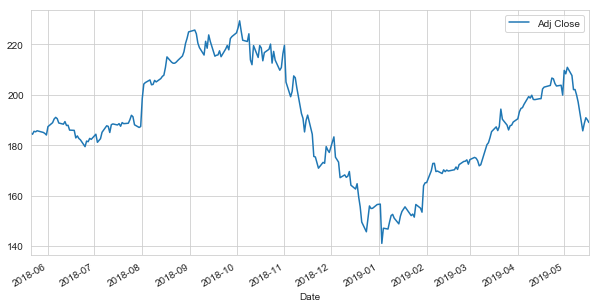

In [8]:
AAPL['Adj Close'].plot(legend= True, figsize=(10,5))

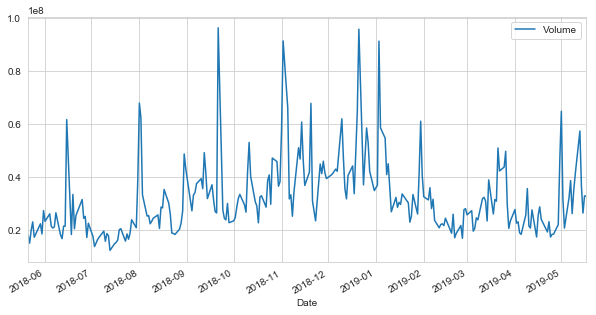

In [9]:
AAPL['Volume'].plot(legend= True, figsize=(10,5))

In [10]:
#Calculating moving averages for 10, 20 and 50 days.

ma_list=[10,20,50,100]

for i in ma_list:
    column_name = "MA for %s days" %(str(i))
    AAPL[column_name]= AAPL['Adj Close'].rolling(i).mean()

Question 1: What was the change in price of the stock over time?

We are calculating moving avergaes using the pandas rolling mean method to calculate that.


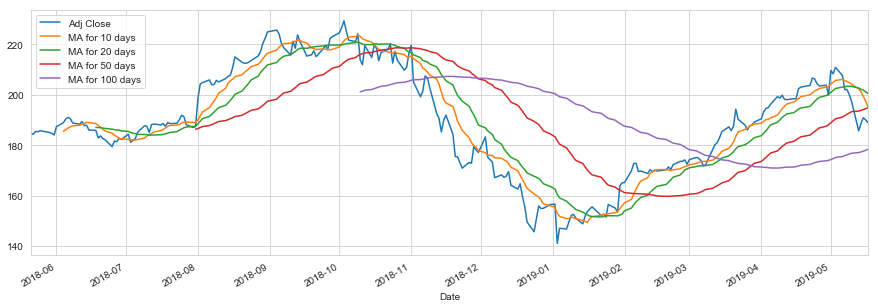

In [11]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(figsize=(15,5))

Question 2: What was the daily return of the stock on average?


We will use the pandas pct.change()method to calculate this.

In [12]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2018-05-21,189.270004,186.910004,188.000000,187.630005,18400800.0,184.816711,NaN,NaN,NaN,NaN
2018-05-22,188.880005,186.779999,188.380005,187.160004,15240700.0,184.353760,NaN,NaN,NaN,NaN
2018-05-23,188.500000,185.759995,186.350006,188.360001,20058400.0,185.535767,NaN,NaN,NaN,NaN
2018-05-24,188.839996,186.210007,188.770004,188.149994,23234000.0,185.328918,NaN,NaN,NaN,NaN
2018-05-25,189.649994,187.649994,188.229996,188.580002,17461000.0,185.752487,NaN,NaN,NaN,NaN


In [14]:
#AAPL.drop(['MA for 300 days', 'MA for 200 days'], axis=1, inplace= True)

In [15]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2018-05-21,189.270004,186.910004,188.000000,187.630005,18400800.0,184.816711,NaN,NaN,NaN,NaN
2018-05-22,188.880005,186.779999,188.380005,187.160004,15240700.0,184.353760,NaN,NaN,NaN,NaN
2018-05-23,188.500000,185.759995,186.350006,188.360001,20058400.0,185.535767,NaN,NaN,NaN,NaN
2018-05-24,188.839996,186.210007,188.770004,188.149994,23234000.0,185.328918,NaN,NaN,NaN,NaN
2018-05-25,189.649994,187.649994,188.229996,188.580002,17461000.0,185.752487,NaN,NaN,NaN,NaN


In [16]:
AAPL['Daily Return']= AAPL['Adj Close']. pct_change()

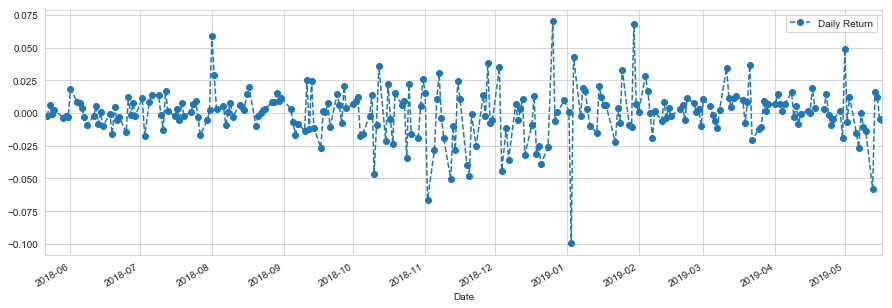

In [17]:
AAPL['Daily Return']. plot(legend = True, marker ='o', linestyle='--', figsize=(15, 5))

This graph gives daily retunrs in percentage throughout the year for apple stock. So n Aug 2018, max return was around 7%. 

In [18]:
CloseStock= data.get_data_yahoo(tech_list)['Adj Close']

In [19]:
CloseStock.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2010-01-04,20.307869,133.899994,311.349976,24.525019
2010-01-05,20.342979,134.690002,309.978882,24.532942
2010-01-06,20.019398,132.250000,302.164703,24.382378
2010-01-07,19.982389,130.000000,295.130463,24.128809
2010-01-08,20.115240,133.520004,299.064880,24.295214


In [28]:
tech_rets= CloseStock.pct_change()
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.005900,-0.004404,0.000323
2010-01-06,-0.015906,-0.018116,-0.025209,-0.006137
2010-01-07,-0.001849,-0.017013,-0.023279,-0.010400
2010-01-08,0.006648,0.027077,0.013331,0.006897


/Users/sanch_g/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


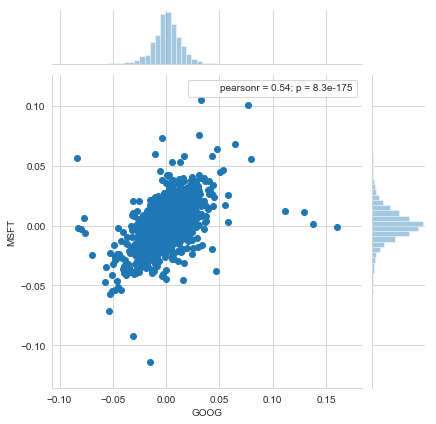

In [32]:
import scipy.stats as stats

j= sns.jointplot('GOOG', 'MSFT', data=tech_rets)
j.annotate(stats.pearsonr)
plt.show()

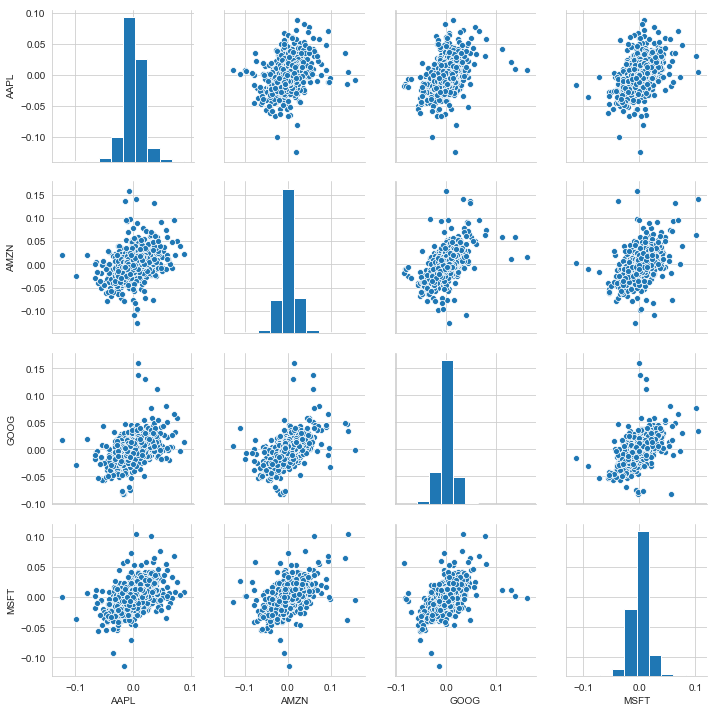

In [33]:
sns.pairplot(tech_rets.dropna())

Just by visualizing above graphs, we can see some kind of correlation between different stocks.

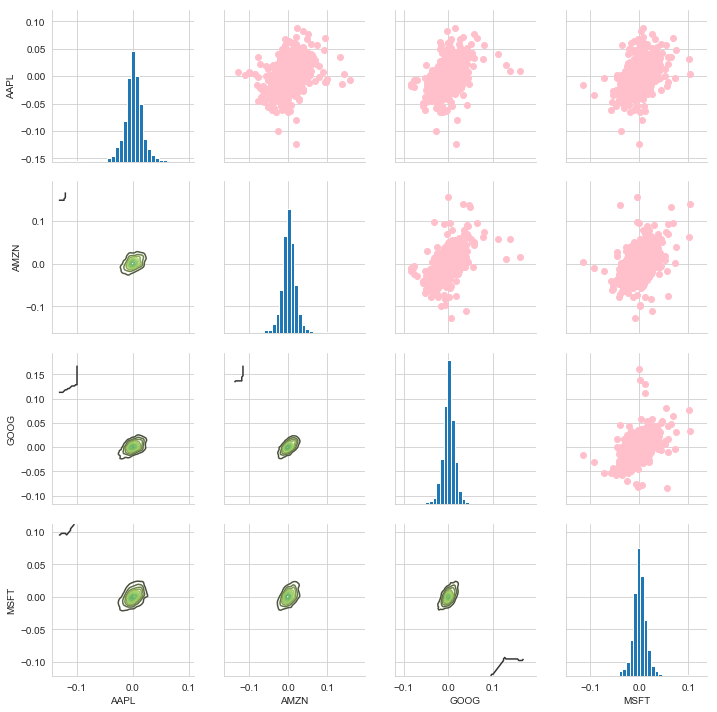

In [39]:
figure= sns.PairGrid(tech_rets.dropna())

figure.map_upper(plt.scatter, color='pink')
figure.map_lower(sns.kdeplot, cmap='summer_d')
figure.map_diag(plt.hist, bins=30)

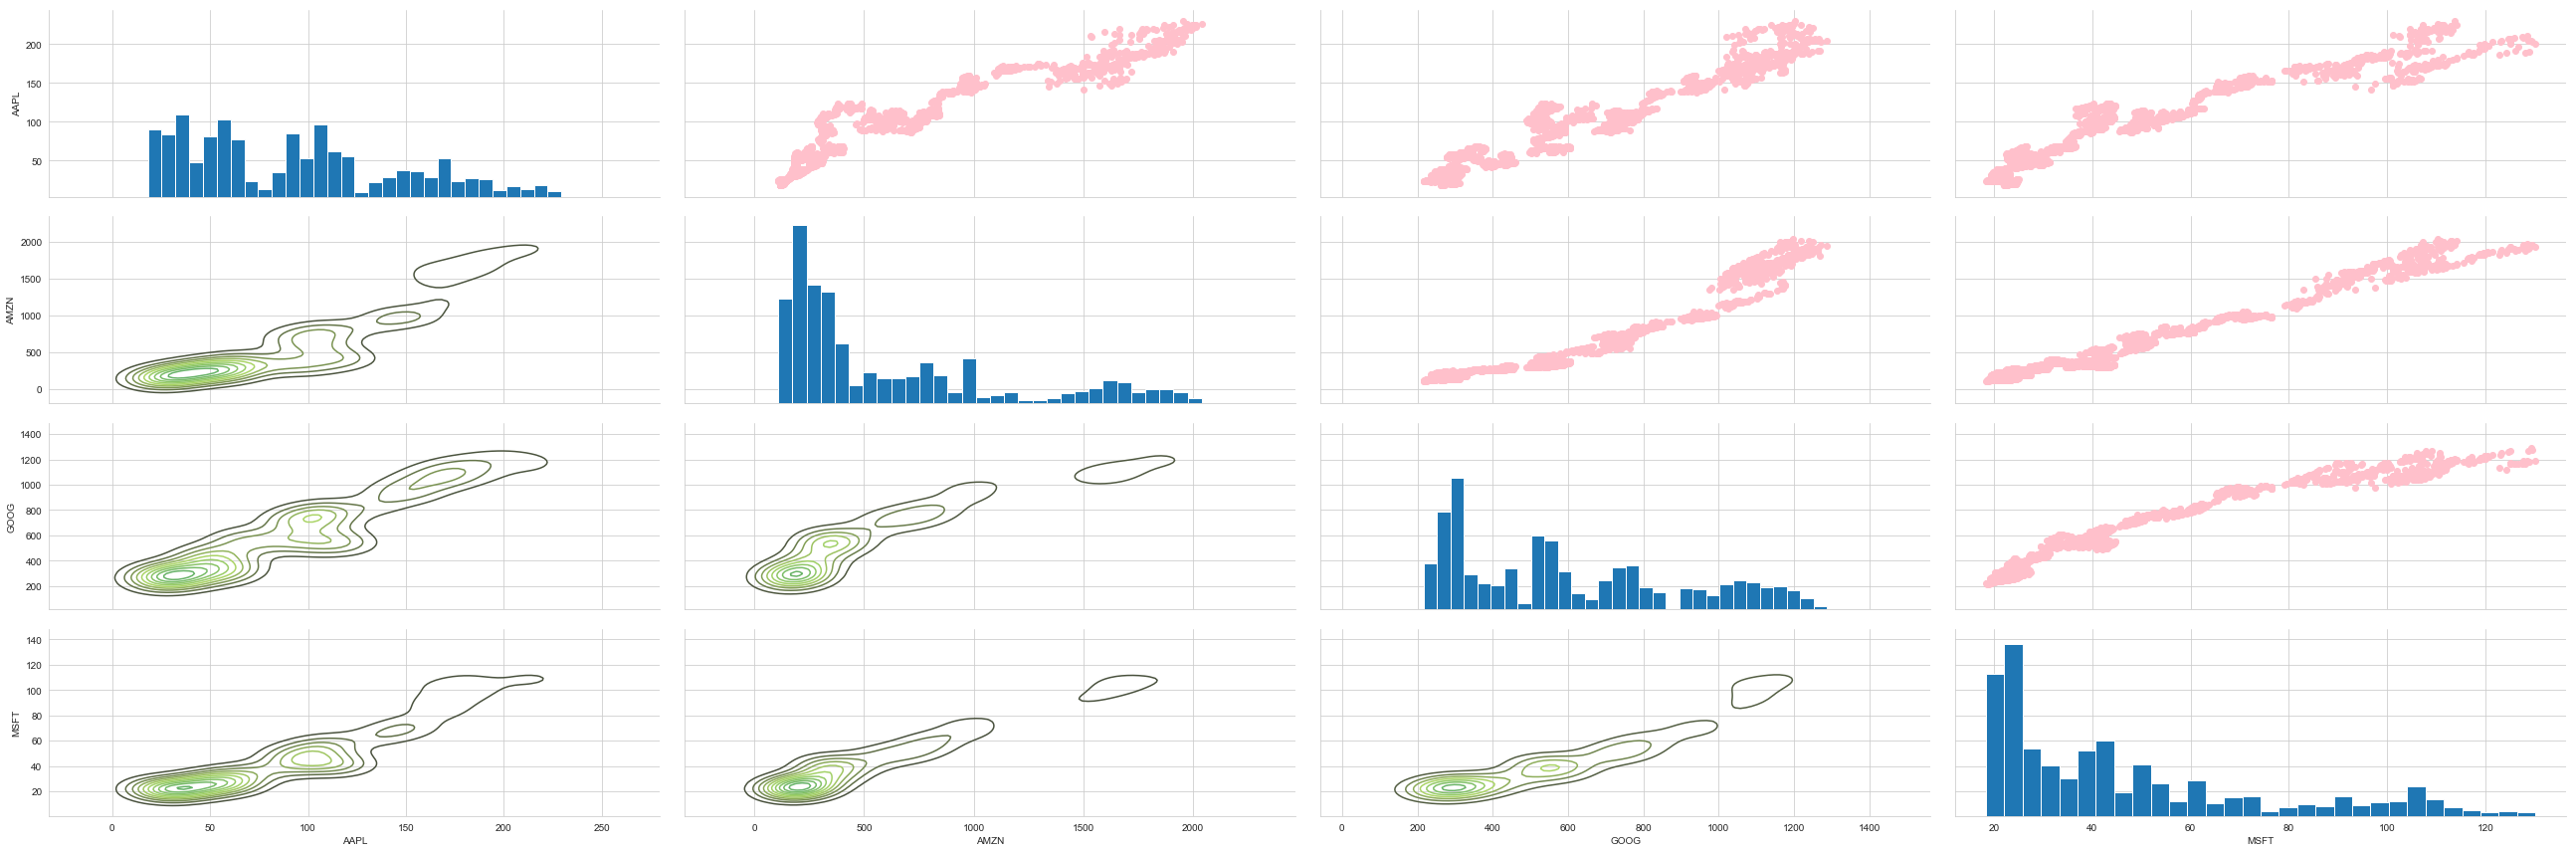

In [43]:
figure= sns.PairGrid(CloseStock.dropna(), aspect=3, height=3)

figure.map_upper(plt.scatter, color='pink')
figure.map_lower(sns.kdeplot, cmap='summer_d')
figure.map_diag(plt.hist, bins=30)

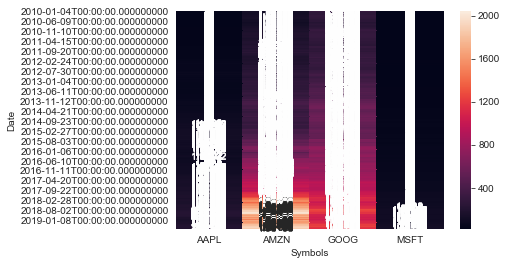

In [51]:
#closingstock = CloseStock.pivot("Date", "Symbols")
sns.heatmap(CloseStock.dropna(), annot=True)

Text(0, 0.5, 'Risk')

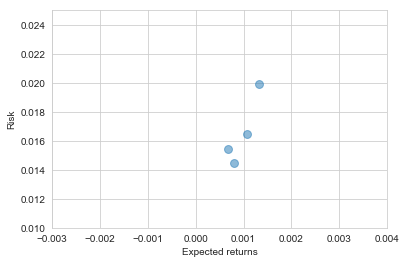

In [60]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))